In [1]:
import pandas as pd
import numpy as np
import os
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn import tree
from sklearn.metrics import classification_report

In [109]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import Model
import tensorflow_model_optimization as tfmot

from tensorflow.keras.utils import Sequence
from sklearn.model_selection import train_test_split
import pickle
import math
import seaborn
import matplotlib.pyplot as plt

In [107]:
def cleanUp(df):
    df.drop(columns=["Team_abbrev", "Opponent_abbrev", "vis_team", "home_team", "Roof", "Surface"], inplace = True)

    df.drop(columns=["Vegas_Favorite"], inplace=True)

    df.drop(columns=["game_date"], inplace=True)

    df.drop(columns=["Vegas_Line", "Over_Under"], inplace=True)

In [106]:
def normalize_data(df):
    df = (df - df.mean())/df.std()
    df.dropna(axis=1, how='all', inplace=True)
    return df

In [110]:
def split_data(df, string):
    Y = np.asarray(df[string])
    df.drop(columns = [string], inplace = True)
    X = np.asarray(df).astype(np.float32)
    X = X.reshape(X.shape[0], -1)
    Xtrain, Xtest, ytrain, ytest = train_test_split(X, Y, test_size=.2)
    return X,Y, Xtrain, Xtest, ytrain, ytest

In [113]:
def train(Xtrain, ytrain):
    model_forest = RandomForestRegressor()
    forest=model_forest.fit(Xtrain, ytrain)
    return forest

In [104]:
def analyze(df, string,model, Xtest, ytest):
    ypred = forest.predict(Xtest)
    mn = df[string].mean()
    st = df[string].std()
    ypred  = (ypred * st) + mn
    ytest = (ytest * st) + mn
    ypred = np.around(ypred)
    ytest = np.around(ytest)
    return ypred, ytest

In [103]:
def save_model(model, name):
    filename = 'model' + name + '.sav'
    pickle.dump(model, open(filename, 'wb'))

In [112]:
df_nfl_players_stats = pd.read_csv("C:/Users/carlo/Downloads/nfl_pass_rush_receive_raw_data.csv")

C:\Users\carlo\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (66) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [ ]:
current_stadistic = "pass_att"
cleanUp(df_nfl_players_stats)
norm = normalize_data(df_nfl_players_stats)
X,Y, Xtrain, Xtest, ytrain, ytest = split_data(norm, current_stadistic)
model = train(Xtrain, ytrain)
ypred, ytest = analyze(df_nfl_players_stats, current_stadistic, model, Xtest, ytest)
save_model(model, current_stadistic) 

In [4]:
df_nfl_players_stats

,game_id,player_id,pos,player,team,pass_cmp,pass_att,pass_yds,pass_td,pass_int,...,OT,Roof,Surface,Temperature,Humidity,Wind_Speed,Vegas_Line,Vegas_Favorite,Over_Under,game_date
0,201909050chi,RodgAa00,QB,Aaron Rodgers,GNB,18,30,203,1,0,...,False,outdoors,grass,65,69,10,-3.5,CHI,47.0,2019-09-05
1,201909050chi,JoneAa00,RB,Aaron Jones,GNB,0,0,0,0,0,...,False,outdoors,grass,65,69,10,-3.5,CHI,47.0,2019-09-05
2,201909050chi,ValdMa00,WR,Marquez Valdes-Scantling,GNB,0,0,0,0,0,...,False,outdoors,grass,65,69,10,-3.5,CHI,47.0,2019-09-05
3,201909050chi,AdamDa01,WR,Davante Adams,GNB,0,0,0,0,0,...,False,outdoors,grass,65,69,10,-3.5,CHI,47.0,2019-09-05
4,201909050chi,GrahJi00,TE,Jimmy Graham,GNB,0,0,0,0,0,...,False,outdoors,grass,65,69,10,-3.5,CHI,47.0,2019-09-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26595,202301080was,ThomLo00,TE,Logan Thomas,WAS,0,0,0,0,0,...,False,outdoors,grass,42,53,7,NaN,NaN,NaN,2023-01-08
26596,202301080was,SimsCa00,WR,Cam Sims,WAS,0,0,0,0,0,...,False,outdoors,grass,42,53,7,NaN,NaN,NaN,2023-01-08
26597,202301080was,SamuCu00,WR,Curtis Samuel,WAS,0,0,0,0,0,...,False,outdoors,grass,42,53,7,NaN,NaN,NaN,2023-01-08
26598,202301080was,BonnRe00,RB,Reggie Bonnafon,WAS,0,0,0,0,0,...,False,outdoors,grass,42,53,7,NaN,NaN,NaN,2023-01-08


In [8]:
df_nfl_players_stats[df_nfl_players_stats["pos"]=="QB"]

,game_id,player_id,pos,player,team,pass_att,pass_yds,pass_td,pass_int,pass_sacked,...,rec_yac,rec_drops,offense,off_pct,vis_score,home_score,OT,Temperature,Humidity,Wind_Speed
0,201909050chi,RodgAa00,QB,Aaron Rodgers,GNB,30,203,1,0,5,...,0,0,61,100,10,3,False,65,69,10
9,201909050chi,TrubMi00,QB,Mitchell Trubisky,CHI,45,228,0,1,5,...,0,0,71,100,10,3,False,65,69,10
29,201909080car,GoffJa00,QB,Jared Goff,LAR,39,186,1,1,1,...,0,0,76,100,30,27,False,87,53,3
36,201909080car,NewtCa00,QB,Cam Newton,CAR,38,239,0,1,3,...,0,0,66,100,30,27,False,87,53,3
44,201909080cle,MariMa01,QB,Marcus Mariota,TEN,24,248,3,0,4,...,0,0,57,97,43,13,False,71,55,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26554,202301080sfo,BlouDa00,QB,David Blough,ARI,18,180,1,2,3,...,0,0,35,67,13,38,False,57,77,2
26565,202301080sfo,PurdBr00,QB,Brock Purdy,SFO,20,178,3,0,4,...,0,0,51,82,13,38,False,57,77,2
26572,202301080was,PresDa01,QB,Dak Prescott,DAL,37,128,1,1,1,...,0,0,61,91,6,26,False,42,53,7
26573,202301080was,RushCo00,QB,Cooper Rush,DAL,1,0,0,0,0,...,0,0,6,9,6,26,False,42,53,7


[[4818    0    0 ...    0    0    0]
 [   0   29    0 ...    0    0    0]
 [   0    0    7 ...    0    0    0]
 ...
 [   0    0    0 ...    0    0    0]
 [   0    0    0 ...    0    0    0]
 [   0    0    0 ...    0    0    0]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      4818
         1.0       1.00      0.97      0.98        30
         2.0       0.78      1.00      0.88         7
         3.0       0.83      0.50      0.62        10
         4.0       0.67      0.80      0.73         5
         5.0       0.40      0.50      0.44         4
         6.0       0.67      0.50      0.57         8
         7.0       0.25      0.25      0.25         4
         8.0       0.33      0.40      0.36         5
         9.0       0.33      0.50      0.40         4
        10.0       0.17      0.50      0.25         2
        11.0       0.33      0.18      0.24        11
        12.0       0.38      0.30      0.33        10
        13.0   

C:\Users\carlo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\carlo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\carlo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\carlo\anaconda3\lib\site-packages\sklearn\metrics\_cla

<AxesSubplot:>

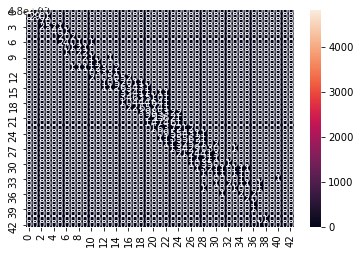

In [21]:
model_forest = RandomForestRegressor()
forest=model_forest.fit(Xtrain, ytrain)

ypred = forest.predict(Xtest)
ypred = np.around(ypred)
cnf_matrix = confusion_matrix(ytest,ypred)
print(cnf_matrix)
print(classification_report(ytest,ypred))

seaborn.heatmap(cnf_matrix, annot=True)

## Only QB DATA TRAINING

In [22]:
df_nfl_players_stats = pd.read_csv("C:/Users/carlo/Downloads/nfl_pass_rush_receive_raw_data.csv")

C:\Users\carlo\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (66) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [23]:
df_nfl_players_stats.drop(columns=["Team_abbrev", "Opponent_abbrev", "vis_team", "home_team", "Roof", "Surface"], inplace = True)

df_nfl_players_stats.drop(columns=["Vegas_Favorite"], inplace=True)

df_nfl_players_stats.drop(columns=["game_date"], inplace=True)

df_nfl_players_stats.drop(columns=["Vegas_Line", "Over_Under"], inplace=True)

In [24]:
df_qb = df_nfl_players_stats[df_nfl_players_stats["pos"]=="QB"]

In [25]:
df_qb

,game_id,player_id,pos,player,team,pass_cmp,pass_att,pass_yds,pass_td,pass_int,...,rec_yac,rec_drops,offense,off_pct,vis_score,home_score,OT,Temperature,Humidity,Wind_Speed
0,201909050chi,RodgAa00,QB,Aaron Rodgers,GNB,18,30,203,1,0,...,0,0,61,100,10,3,False,65,69,10
9,201909050chi,TrubMi00,QB,Mitchell Trubisky,CHI,26,45,228,0,1,...,0,0,71,100,10,3,False,65,69,10
29,201909080car,GoffJa00,QB,Jared Goff,LAR,23,39,186,1,1,...,0,0,76,100,30,27,False,87,53,3
36,201909080car,NewtCa00,QB,Cam Newton,CAR,25,38,239,0,1,...,0,0,66,100,30,27,False,87,53,3
44,201909080cle,MariMa01,QB,Marcus Mariota,TEN,14,24,248,3,0,...,0,0,57,97,43,13,False,71,55,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26554,202301080sfo,BlouDa00,QB,David Blough,ARI,14,18,180,1,2,...,0,0,35,67,13,38,False,57,77,2
26565,202301080sfo,PurdBr00,QB,Brock Purdy,SFO,15,20,178,3,0,...,0,0,51,82,13,38,False,57,77,2
26572,202301080was,PresDa01,QB,Dak Prescott,DAL,14,37,128,1,1,...,0,0,61,91,6,26,False,42,53,7
26573,202301080was,RushCo00,QB,Cooper Rush,DAL,0,1,0,0,0,...,0,0,6,9,6,26,False,42,53,7


In [89]:
df1 = pd.read_csv("C:/Users/carlo/Downloads/nfl_pass_rush_receive_raw_data.csv")

C:\Users\carlo\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (66) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [90]:
cleanUp(df1)

In [91]:
norm = normalize_data(df1)

In [26]:
Y = np.asarray(df_qb["pass_cmp"])
df_qb.drop(columns=["pass_cmp"], inplace=True)

C:\Users\carlo\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [27]:
df_qb

,game_id,player_id,pos,player,team,pass_att,pass_yds,pass_td,pass_int,pass_sacked,...,rec_yac,rec_drops,offense,off_pct,vis_score,home_score,OT,Temperature,Humidity,Wind_Speed
0,201909050chi,RodgAa00,QB,Aaron Rodgers,GNB,30,203,1,0,5,...,0,0,61,100,10,3,False,65,69,10
9,201909050chi,TrubMi00,QB,Mitchell Trubisky,CHI,45,228,0,1,5,...,0,0,71,100,10,3,False,65,69,10
29,201909080car,GoffJa00,QB,Jared Goff,LAR,39,186,1,1,1,...,0,0,76,100,30,27,False,87,53,3
36,201909080car,NewtCa00,QB,Cam Newton,CAR,38,239,0,1,3,...,0,0,66,100,30,27,False,87,53,3
44,201909080cle,MariMa01,QB,Marcus Mariota,TEN,24,248,3,0,4,...,0,0,57,97,43,13,False,71,55,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26554,202301080sfo,BlouDa00,QB,David Blough,ARI,18,180,1,2,3,...,0,0,35,67,13,38,False,57,77,2
26565,202301080sfo,PurdBr00,QB,Brock Purdy,SFO,20,178,3,0,4,...,0,0,51,82,13,38,False,57,77,2
26572,202301080was,PresDa01,QB,Dak Prescott,DAL,37,128,1,1,1,...,0,0,61,91,6,26,False,42,53,7
26573,202301080was,RushCo00,QB,Cooper Rush,DAL,1,0,0,0,0,...,0,0,6,9,6,26,False,42,53,7


In [28]:
X = np.asarray(df_qb.iloc[:,5:]).astype(np.float32)
X = X.reshape(X.shape[0], -1)

In [93]:
X,Y =split_data(norm, "pass_cmp")

In [94]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, Y, test_size=.2)

In [95]:
model_forest = RandomForestRegressor()
forest=model_forest.fit(Xtrain, ytrain)

In [73]:
ytest

-0.005885901282064148

In [72]:
ypred

array([-0., -0., -0., ...,  5., -0., -0.])

In [96]:
ypred, ytest = analyze(df_nfl_players_stats, "pass_cmp", forest, Xtest, ytest)

1.8210526315789475
6.227446500001648


In [97]:
ypred

array([-0., 21., -0., ..., -0., -0., -0.])

In [98]:
ytest

array([ 0., 18.,  0., ...,  0.,  0.,  0.])

In [99]:
cnf_matrix = confusion_matrix(ytest,ypred)
print(cnf_matrix)
print(classification_report(ytest,ypred))

[[4810    0    0 ...    0    0    0]
 [   0   32    2 ...    0    0    0]
 [   0    2   10 ...    0    0    0]
 ...
 [   0    0    0 ...    0    0    0]
 [   0    0    0 ...    1    0    0]
 [   0    0    0 ...    0    0    0]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      4810
         1.0       0.94      0.91      0.93        35
         2.0       0.77      0.77      0.77        13
         3.0       0.60      0.86      0.71         7
         4.0       0.25      0.20      0.22         5
         5.0       0.80      0.44      0.57         9
         6.0       0.50      0.60      0.55         5
         7.0       0.50      0.50      0.50         2
         8.0       0.50      0.50      0.50         6
         9.0       0.25      0.12      0.17         8
        10.0       0.00      0.00      0.00         2
        11.0       0.18      0.17      0.17        12
        12.0       0.10      0.17      0.12         6
        13.0   

C:\Users\carlo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\carlo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\carlo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\carlo\anaconda3\lib\site-packages\sklearn\metrics\_cla

In [102]:
save_model(forest, "pass_cmp")

In [81]:
ytest

array([2., 2., 2., ..., 7., 2., 2.])

## Receiver Stats Training 
### WR / TE / RB

In [31]:
df_nfl_players_stats = pd.read_csv("C:/Users/carlo/Downloads/nfl_pass_rush_receive_raw_data.csv")
df_nfl_players_stats.drop(columns=["Team_abbrev", "Opponent_abbrev", "vis_team", "home_team", "Roof", "Surface"], inplace = True)
df_nfl_players_stats.drop(columns=["Vegas_Favorite"], inplace=True)
df_nfl_players_stats.drop(columns=["game_date"], inplace=True)
df_nfl_players_stats.drop(columns=["Vegas_Line", "Over_Under"], inplace=True)

C:\Users\carlo\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (66) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [32]:
df_receiver = df_nfl_players_stats.copy()
df_receiver= df_receiver[df_receiver["pos"].isin(["WR", "TE", "RB"])]

In [33]:
df_receiver

,game_id,player_id,pos,player,team,pass_cmp,pass_att,pass_yds,pass_td,pass_int,...,rec_yac,rec_drops,offense,off_pct,vis_score,home_score,OT,Temperature,Humidity,Wind_Speed
1,201909050chi,JoneAa00,RB,Aaron Jones,GNB,0,0,0,0,0,...,1,0,37,61,10,3,False,65,69,10
2,201909050chi,ValdMa00,WR,Marquez Valdes-Scantling,GNB,0,0,0,0,0,...,2,0,41,67,10,3,False,65,69,10
3,201909050chi,AdamDa01,WR,Davante Adams,GNB,0,0,0,0,0,...,19,0,59,97,10,3,False,65,69,10
4,201909050chi,GrahJi00,TE,Jimmy Graham,GNB,0,0,0,0,0,...,17,0,33,54,10,3,False,65,69,10
5,201909050chi,DaviTr03,WR,Trevor Davis,GNB,0,0,0,0,0,...,10,0,17,28,10,3,False,65,69,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26595,202301080was,ThomLo00,TE,Logan Thomas,WAS,0,0,0,0,0,...,6,0,46,70,6,26,False,42,53,7
26596,202301080was,SimsCa00,WR,Cam Sims,WAS,0,0,0,0,0,...,0,0,12,18,6,26,False,42,53,7
26597,202301080was,SamuCu00,WR,Curtis Samuel,WAS,0,0,0,0,0,...,1,0,35,53,6,26,False,42,53,7
26598,202301080was,BonnRe00,RB,Reggie Bonnafon,WAS,0,0,0,0,0,...,0,0,3,5,6,26,False,42,53,7


In [34]:
Y = np.asarray(df_receiver["rec"])
df_receiver.drop(columns=["rec"], inplace=True)

X = np.asarray(df_receiver.iloc[:,5:]).astype(np.float32)
X = X.reshape(X.shape[0], -1)

Xtrain, Xtest, ytrain, ytest = train_test_split(X, Y, test_size=.2)

[[1430    1    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0]
 [   1  870   50    2    0    0    0    0    0    0    0    0    0    0
     0    0    0]
 [   0    7  576   69    6    0    0    0    0    0    0    0    0    0
     0    0    0]
 [   0    0   28  395   72    8    0    1    0    0    0    0    0    0
     0    0    0]
 [   0    0    0   39  278   29    7    0    0    0    0    0    0    0
     0    0    0]
 [   0    0    0    2   48  174   25    2    0    0    0    0    0    0
     0    0    0]
 [   0    0    0    0    0   42  108   18    3    1    0    0    0    0
     0    0    0]
 [   0    0    0    0    0    1   32   53   20    3    0    0    0    0
     0    0    0]
 [   0    0    0    0    0    0    0   18   39    7    1    0    0    0
     0    0    0]
 [   0    0    0    0    0    0    0    0   20   17    4    1    0    0
     0    0    0]
 [   0    0    0    0    0    0    0    0    0    9    5    2    0    0
     0    0    0]
 [   0    

C:\Users\carlo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\carlo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\carlo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<AxesSubplot:>

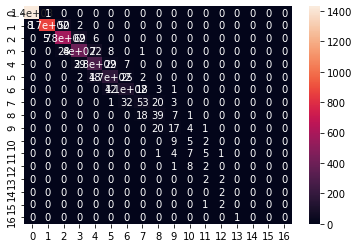

In [35]:
model_receiver = RandomForestRegressor()
forest_receiver=model_receiver.fit(Xtrain, ytrain)

ypred = forest_receiver.predict(Xtest)
ypred = np.around(ypred)
cnf_matrix = confusion_matrix(ytest,ypred)
print(cnf_matrix)
print(classification_report(ytest,ypred))

seaborn.heatmap(cnf_matrix, annot=True)

In [36]:
df_nfl_players_stats = pd.read_csv("C:/Users/carlo/Downloads/nfl_pass_rush_receive_raw_data.csv")
df_nfl_players_stats.drop(columns=["Team_abbrev", "Opponent_abbrev", "vis_team", "home_team", "Roof", "Surface"], inplace = True)
df_nfl_players_stats.drop(columns=["Vegas_Favorite"], inplace=True)
df_nfl_players_stats.drop(columns=["game_date"], inplace=True)
df_nfl_players_stats.drop(columns=["Vegas_Line", "Over_Under"], inplace=True)
df_receiver_all = df_nfl_players_stats.copy()

C:\Users\carlo\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (66) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [37]:
Y = np.asarray(df_receiver_all["rec"])
df_receiver_all.drop(columns=["rec"], inplace=True)

X = np.asarray(df_receiver_all.iloc[:,5:]).astype(np.float32)
X = X.reshape(X.shape[0], -1)

Xtrain, Xtest, ytrain, ytest = train_test_split(X, Y, test_size=.2)

In [38]:
model_receiver_all = RandomForestRegressor()
forest_receiver_all=model_receiver_all.fit(Xtrain, ytrain)

ypred = forest_receiver_all.predict(Xtest)
ypred = np.around(ypred)
cnf_matrix = confusion_matrix(ytest,ypred)
print(cnf_matrix)
print(classification_report(ytest,ypred))

[[2136    0    0    0    0    0    0    0    0    0    0    0    0    0
     0]
 [   2  913   41    5    0    0    0    0    0    0    0    0    0    0
     0]
 [   0   12  615   54    3    1    0    0    0    0    0    0    0    0
     0]
 [   0    1   24  385   57    7    0    1    0    0    0    0    0    0
     0]
 [   0    0    0   32  281   37    9    1    0    0    0    0    0    0
     0]
 [   0    0    0    0   44  183   25    4    0    1    0    0    0    0
     0]
 [   0    0    0    0    0   48   87   20    4    0    0    0    0    0
     0]
 [   0    0    0    0    0    3   51   49   14    2    0    0    0    0
     0]
 [   0    0    0    0    0    0    4   27   30    6    2    1    0    0
     0]
 [   0    0    0    0    0    0    0    1   21   19    9    0    0    0
     0]
 [   0    0    0    0    0    0    0    0    4   13    4    2    1    0
     0]
 [   0    0    0    0    0    0    0    0    0    2    4    4    0    0
     0]
 [   0    0    0    0    0    0    0    

C:\Users\carlo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\carlo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\carlo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [39]:
importances = forest_receiver_all.feature_importances_

In [40]:
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)

In [41]:
index = list(df_receiver_all.columns)
del index[:5]

In [42]:
print(index)

['pass_cmp', 'pass_att', 'pass_yds', 'pass_td', 'pass_int', 'pass_sacked', 'pass_sacked_yds', 'pass_long', 'pass_rating', 'rush_att', 'rush_yds', 'rush_td', 'rush_long', 'targets', 'rec_yds', 'rec_td', 'rec_long', 'fumbles_lost', 'rush_scrambles', 'designed_rush_att', 'comb_pass_rush_play', 'comb_pass_play', 'comb_rush_play', 'two_point_conv', 'total_ret_td', 'offensive_fumble_recovery_td', 'pass_yds_bonus', 'rush_yds_bonus', 'rec_yds_bonus', 'Total_DKP', 'Off_DKP', 'Total_FDP', 'Off_FDP', 'Total_SDP', 'Off_SDP', 'pass_target_yds', 'pass_poor_throws', 'pass_blitzed', 'pass_hurried', 'rush_yds_before_contact', 'rush_yac', 'rush_broken_tackles', 'rec_air_yds', 'rec_yac', 'rec_drops', 'offense', 'off_pct', 'vis_score', 'home_score', 'OT', 'Temperature', 'Humidity', 'Wind_Speed']


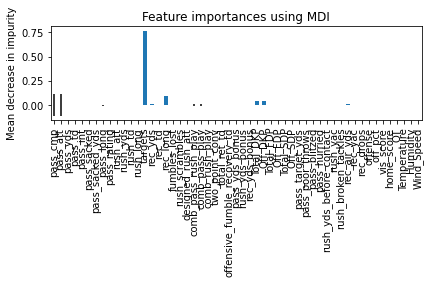

In [43]:
import matplotlib.pyplot as plt
forest_importances = pd.Series(importances, index=index)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [44]:
importances

array([1.16712673e-05, 1.24938805e-05, 1.36143785e-05, 5.46274582e-06,
       1.20438201e-06, 2.84353560e-06, 4.11607405e-06, 1.32506281e-05,
       2.84941353e-05, 2.09803463e-04, 8.03878214e-04, 1.08990971e-04,
       6.34643442e-04, 7.68653428e-01, 9.69550554e-03, 1.87484379e-03,
       9.78496668e-02, 2.23977523e-04, 4.45670941e-08, 2.03249628e-04,
       2.34268303e-04, 1.44115429e-05, 1.74532646e-04, 1.68798207e-04,
       1.49404110e-06, 4.04821506e-06, 1.10273046e-06, 8.57903079e-06,
       5.50692206e-05, 4.19056784e-02, 4.23178053e-02, 1.15621608e-03,
       1.20112420e-03, 1.19456176e-03, 1.22704381e-03, 2.68014083e-05,
       8.69792327e-06, 9.00019989e-06, 2.92372771e-06, 6.45655555e-04,
       5.84576925e-04, 1.89168812e-04, 1.08414922e-02, 5.71421167e-03,
       2.97549390e-03, 1.39748110e-03, 1.46323387e-03, 1.44389415e-03,
       1.58595783e-03, 1.44626646e-04, 1.04447320e-03, 1.06254975e-03,
       8.43845159e-04])

In [45]:
df_nfl_players_stats

,game_id,player_id,pos,player,team,pass_cmp,pass_att,pass_yds,pass_td,pass_int,...,rec_yac,rec_drops,offense,off_pct,vis_score,home_score,OT,Temperature,Humidity,Wind_Speed
0,201909050chi,RodgAa00,QB,Aaron Rodgers,GNB,18,30,203,1,0,...,0,0,61,100,10,3,False,65,69,10
1,201909050chi,JoneAa00,RB,Aaron Jones,GNB,0,0,0,0,0,...,1,0,37,61,10,3,False,65,69,10
2,201909050chi,ValdMa00,WR,Marquez Valdes-Scantling,GNB,0,0,0,0,0,...,2,0,41,67,10,3,False,65,69,10
3,201909050chi,AdamDa01,WR,Davante Adams,GNB,0,0,0,0,0,...,19,0,59,97,10,3,False,65,69,10
4,201909050chi,GrahJi00,TE,Jimmy Graham,GNB,0,0,0,0,0,...,17,0,33,54,10,3,False,65,69,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26595,202301080was,ThomLo00,TE,Logan Thomas,WAS,0,0,0,0,0,...,6,0,46,70,6,26,False,42,53,7
26596,202301080was,SimsCa00,WR,Cam Sims,WAS,0,0,0,0,0,...,0,0,12,18,6,26,False,42,53,7
26597,202301080was,SamuCu00,WR,Curtis Samuel,WAS,0,0,0,0,0,...,1,0,35,53,6,26,False,42,53,7
26598,202301080was,BonnRe00,RB,Reggie Bonnafon,WAS,0,0,0,0,0,...,0,0,3,5,6,26,False,42,53,7
